In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

classes = ['DOG', 'CAT']

In [2]:
x_train = np.loadtxt("./mnist/input.csv",delimiter=",")
y_train = np.loadtxt('./mnist/labels.csv', delimiter =',')
x_test = np.loadtxt('./mnist/input_test.csv', delimiter =',')
y_test = np.loadtxt('./mnist/labels_test.csv', delimiter =',')

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [3]:
x_train = x_train.reshape(-1,100,100,3)
print(x_train.shape)
x_test = x_test.reshape(-1,100,100,3)
print(x_test.shape)

(2000, 100, 100, 3)
(400, 100, 100, 3)


In [4]:
x_train = x_train/255
x_test = x_test/255

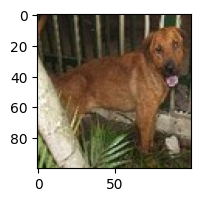

0.0
DOG


In [5]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[0])
plt.show()
print(y_train[0])
print(classes[int(y_train[0])])

CNN

In [6]:
model = keras.Sequential([
    # convolution
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),  activation='relu', input_shape=(100,100,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),  activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.2),

    # dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

H = model.fit(x_train, y_train, epochs=15)

Epoch 1/15
63/63 [==============================] - 7s 17ms/step - loss: 0.7238 - accuracy: 0.5590
Epoch 2/15
63/63 [==============================] - 1s 15ms/step - loss: 0.6628 - accuracy: 0.6110
Epoch 3/15
63/63 [==============================] - 1s 15ms/step - loss: 0.5930 - accuracy: 0.6890
Epoch 4/15
63/63 [==============================] - 1s 15ms/step - loss: 0.5219 - accuracy: 0.7390
Epoch 5/15
63/63 [==============================] - 1s 15ms/step - loss: 0.4274 - accuracy: 0.8015
Epoch 6/15
63/63 [==============================] - 1s 15ms/step - loss: 0.3569 - accuracy: 0.8390
Epoch 7/15
63/63 [==============================] - 1s 15ms/step - loss: 0.2724 - accuracy: 0.8905
Epoch 8/15
63/63 [==============================] - 1s 15ms/step - loss: 0.2230 - accuracy: 0.9125
Epoch 9/15
63/63 [==============================] - 1s 15ms/step - loss: 0.1570 - accuracy: 0.9430
Epoch 10/15
63/63 [==============================] - 1s 15ms/step - loss: 0.1226 - accuracy: 0.9565
Epoch 11/

EVALUATE MODEL

In [7]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 4ms/step - loss: 1.4287 - accuracy: 0.6800


[1.42867112159729, 0.6800000071525574]

Text(0, 0.5, 'loss')

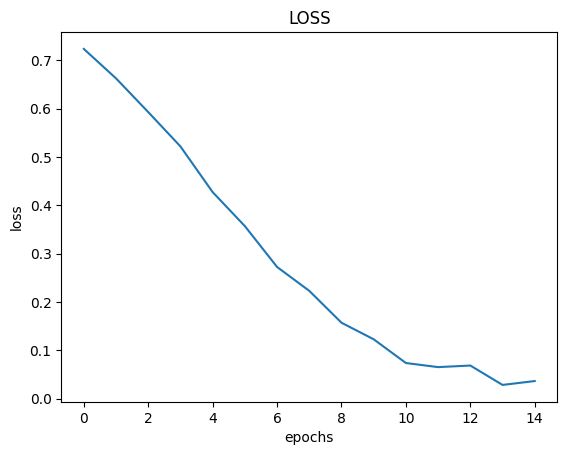

In [8]:
plt.plot(H.history['loss'], label='training_loss')
plt.title('LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')

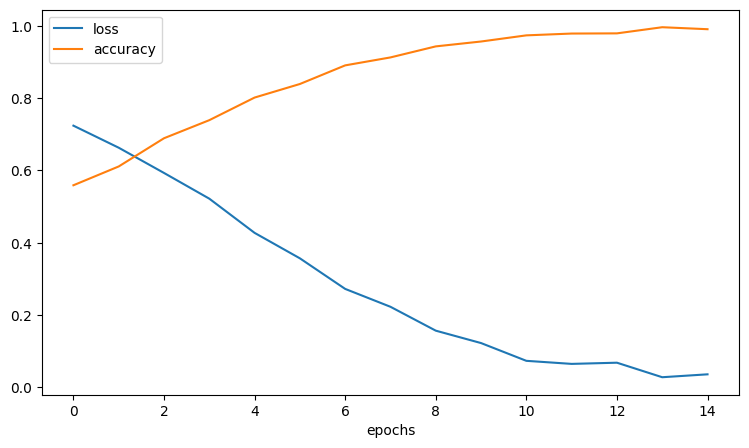

In [9]:
pd.DataFrame(H.history).plot(figsize=(9,5))
plt.xlabel('epochs')
plt.show()

PREDICTION

In [10]:
y_pred = model.predict(x_test)
y_pred[:5]

13/13 [==============================] - 0s 4ms/step


array([[6.5137136e-01],
       [1.1320722e-02],
       [7.9259092e-01],
       [6.1695922e-02],
       [2.5687244e-04]], dtype=float32)

In [11]:
y_pred = [1 if i>=0.5 else 0 for i in y_pred]
y_pred

[1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,


In [12]:
# for i in range(len(y_pred)):
#     y_pred = y_pred >= 0.5

# y_pred

RANDOM PREDICTIONS

CAT


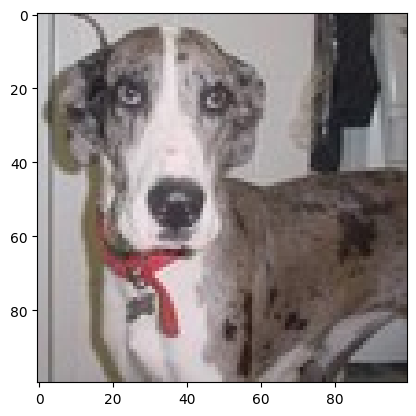

In [13]:
r = random.randint(0,400)
plt.imshow(x_test[r])
if y_pred[r]>=0.5:
    print('CAT')
else:
    print('DOG')


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.60      0.65       200
         1.0       0.66      0.76      0.70       200

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400



In [15]:
cm = tf.math.confusion_matrix(y_test, y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[120,  80],
       [ 48, 152]])>

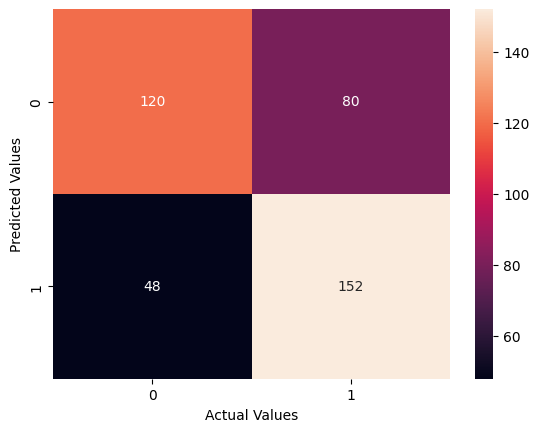

In [16]:
# plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()